In [25]:
import pandas as pd
import pytz
import sklearn
# from sklearn.ensemble import IsolationForest
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 


def load_data(path):
    """
    ARGS: path to the local .csv file
    Load data and search for the Date_Time column to index the dataframe by a datetime value.

    """
    data = pd.read_csv(path,delimiter=";")  # , engine='python')
    data["Date_Time"] = pd.to_datetime(data["Date_Time"])
    data.set_index("Date_Time", inplace=True)
    chile = pytz.timezone("Chile/Continental")
    data.index = data.index.tz_localize(pytz.utc).tz_convert(chile)
    return data


In [12]:
local_path = 'C:\\Users\\elmha\\OneDrive - Universidad de Chile\\GitHub\\Sistema_Experto_APP\\data\Horcon-etiquetado_con_1_etiqueta.csv'

df = load_data(local_path)

In [79]:
y = df['etiqueta conjunta']
X = df.drop(labels='etiqueta conjunta',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=False, test_size=0.2, random_state=42)


In [80]:
clf = IsolationForest(random_state=0,contamination=0.1).fit(X_train)

out=clf.predict(X_test)

In [82]:
new_df = pd.DataFrame()
new_df['real'] = y_test
new_df['predicted'] = out

In [83]:
new_df.replace(to_replace=-1,value=0,inplace=True)

In [84]:
print(sklearn.metrics.classification_report(new_df['real'].values,new_df['predicted'].values))

              precision    recall  f1-score   support

           0       0.62      0.31      0.42      5313
           1       0.15      0.39      0.22      1653

    accuracy                           0.33      6966
   macro avg       0.39      0.35      0.32      6966
weighted avg       0.51      0.33      0.37      6966



In [85]:
new_df[new_df['real']==1]


,real,predicted
Date_Time,,
2016-03-05 21:00:00-03:00,1,0
2016-03-05 22:00:00-03:00,1,1
2016-03-05 23:00:00-03:00,1,1
2016-03-06 00:00:00-03:00,1,1
2016-03-06 01:00:00-03:00,1,1
...,...,...
2017-02-20 08:00:00-03:00,1,0
2017-02-20 09:00:00-03:00,1,0
2017-02-20 10:00:00-03:00,1,0


In [86]:
clf.get_params()

{'behaviour': 'deprecated',
 'bootstrap': False,
 'contamination': 0.1,
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [87]:
print(X_train.shape)
print(X_test.shape)

(27861, 3)
(6966, 3)


<AxesSubplot:xlabel='Date_Time'>

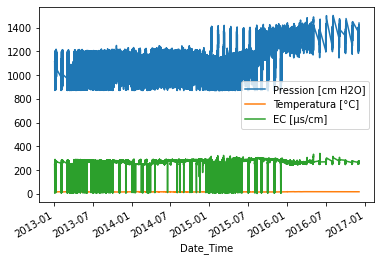

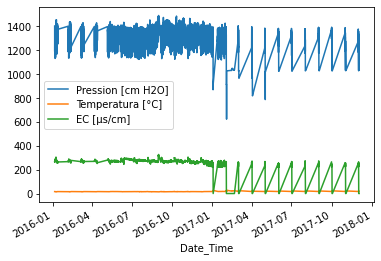

In [88]:
X_train.plot()
X_test.plot()

In [5]:
import requests

url_queries = 'http://agua.niclabs.cl/queries'

api_key_header = {'query-api-key': '919c5e5e086a492398141c1ebd95b711','content_type':'application/json'}
content_type = {}

def get_info_estacion(estacion):
    '''
    ARGS: id estación
    Returns the Json Info file.
    
    '''
    url = url_queries + '/infoestacion'
    payload = {'estacion':str(estacion)}
    r = requests.get(url,params=payload,headers=api_key_header)
    return r.json()

def get_all_data(estacion):
    '''
    ARGS: id estación
    Returns all de the data into a dataframe.
    
    '''
    url = url_queries + '/dataestaciones'
    payload = {'estacion':str(estacion)}
    r = requests.get(url,params=payload,headers=api_key_header)
    return r.json() 


In [17]:
get_info_estacion(4)

{'columns': ['id',
  'cliente',
  'sector',
  'estacion',
  'tipo_estacion',
  'latitud',
  'longitud',
  'altitud',
  'new'],
 'values': ['4',
  'Hidrogeologia',
  'Ventana',
  'Ventana',
  'pozo',
  '-32.74173400',
  '-71.48918590',
  '10.00000000',
  '1']}

In [7]:

def get_estaciones():
    '''
    ARGS: id estación (int)
    Return a [list] of all stations availables
    
    '''
    url = url_queries + '/estaciones'
    payload = {'new':1}
    r = requests.get(url,params=payload,headers=api_key_header)
    return r.json() 

In [11]:
def get_ultimoValor():
    '''
    ARGS: id estación (int)
    Return a [list] of all stations availables
    
    '''
    url = url_queries + '/ultimovalor'
    r = requests.get(url,headers=api_key_header)
    return r.json() 

In [12]:
get_ultimoValor()

{'series': [{'columns': ['time', 'last'],
   'name': 'CE',
   'tags': {'estacion': '1'},
   'values': [['2017-02-20T18:00:00Z', 284.0]]},
  {'columns': ['time', 'last'],
   'name': 'CE',
   'tags': {'estacion': '2'},
   'values': [['2017-02-20T18:00:00Z', 284.0]]},
  {'columns': ['time', 'last'],
   'name': 'CE',
   'tags': {'estacion': '3'},
   'values': [['2017-02-20T18:00:00Z', 288.6438242]]},
  {'columns': ['time', 'last'],
   'name': 'CE',
   'tags': {'estacion': '4'},
   'values': [['2017-02-20T18:00:00Z', 284.0]]},
  {'columns': ['time', 'last'],
   'name': 'Etiquetas',
   'tags': {'estacion': '1'},
   'values': [['2017-02-20T18:00:00Z', 1.0]]},
  {'columns': ['time', 'last'],
   'name': 'Etiquetas',
   'tags': {'estacion': '2'},
   'values': [['2017-02-20T18:00:00Z', 1.0]]},
  {'columns': ['time', 'last'],
   'name': 'Etiquetas',
   'tags': {'estacion': '3'},
   'values': [['2017-02-20T18:00:00Z', 1.0]]},
  {'columns': ['time', 'last'],
   'name': 'P',
   'tags': {'estacion': '

In [6]:
get_all_data(4)

{'series': [{'columns': ['time', 'unidad', 'valor'],
   'name': 'CE',
   'values': [['2013-03-02T16:00:00Z', '8', 301.5311042],
    ['2013-03-02T17:00:00Z', '8', 304.6666667],
    ['2013-03-02T18:00:00Z', '8', 304.2],
    ['2013-03-02T19:00:00Z', '8', 311.7968917],
    ['2013-03-02T20:00:00Z', '8', 302.6],
    ['2013-03-02T21:00:00Z', '8', 302.0],
    ['2013-03-02T22:00:00Z', '8', 301.2],
    ['2013-03-02T23:00:00Z', '8', 301.0],
    ['2013-03-03T00:00:00Z', '8', 301.2],
    ['2013-03-03T01:00:00Z', '8', 301.2],
    ['2013-03-03T02:00:00Z', '8', 301.8],
    ['2013-03-03T03:00:00Z', '8', 302.2],
    ['2013-03-03T04:00:00Z', '8', 302.8],
    ['2013-03-03T05:00:00Z', '8', 303.4],
    ['2013-03-03T06:00:00Z', '8', 304.2],
    ['2013-03-03T07:00:00Z', '8', 304.2],
    ['2013-03-03T08:00:00Z', '8', 304.6],
    ['2013-03-03T09:00:00Z', '8', 304.2],
    ['2013-03-03T10:00:00Z', '8', 303.8],
    ['2013-03-03T11:00:00Z', '8', 303.0],
    ['2013-03-03T12:00:00Z', '8', 302.0],
    ['2013-03-03T13:

<AxesSubplot:xlabel='Date_Time'>

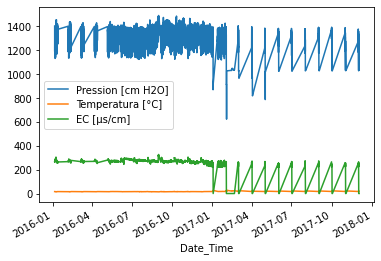

In [89]:
X_test.plot()